<a href="https://colab.research.google.com/github/aminaakm/amina/blob/main/Basic_ROC_regression_without_covariates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving final sample data.csv to final sample data.csv


The AUC (Area Under the Curve) is: 0.6410


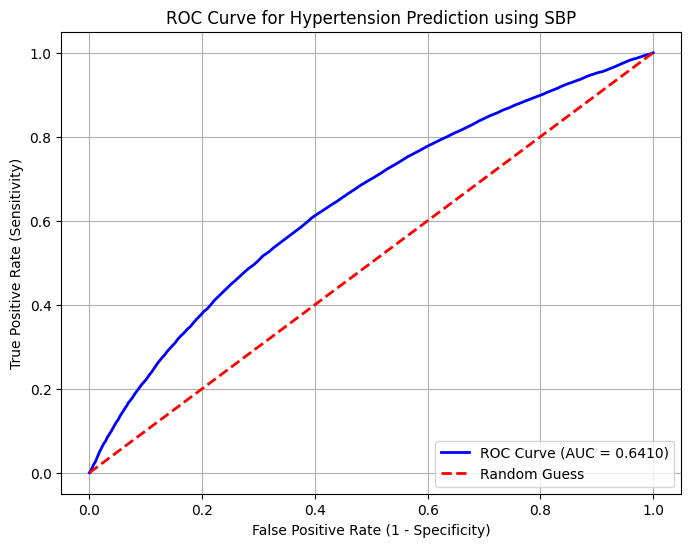

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- 1. Load Data ---
# IMPORTANT: Replace 'your_file.csv' with the actual name of your uploaded file.
# We assume the first file uploaded is the correct one.
file_name = 'final sample data.csv'
df = pd.read_csv(file_name)


# --- 2. Prepare Data ---
# Convert the 'htn_diagnosed' column to a simple binary format (1 for Yes, 0 for No).
# This is required for the scikit-learn functions.
df['htn_binary'] = df['htn_diagnosed'].apply(lambda x: 1 if '1' in str(x) else 0)

# Ensure 'sbp_avg' is a numeric type, converting errors to blank values.
df['sbp_avg'] = pd.to_numeric(df['sbp_avg'], errors='coerce')

# Drop any rows where data might be missing after conversion.
df.dropna(subset=['sbp_avg', 'htn_binary'], inplace=True)


# --- 3. Calculate ROC and AUC ---
# Define the true labels (y_true) and the prediction scores (y_scores).
# The 'htn_binary' column contains the true diagnosis.
# The 'sbp_avg' column acts as the score to test.
y_true = df['htn_binary']
y_scores = df['sbp_avg']

# Calculate the AUC score.
auc = roc_auc_score(y_true, y_scores)
print(f"The AUC (Area Under the Curve) is: {auc:.4f}")

# Calculate the values needed for the ROC curve.
fpr, tpr, thresholds = roc_curve(y_true, y_scores)


# --- 4. Plot the AUC Curve ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Hypertension Prediction using SBP')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()